In [1]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score



In [4]:
df1 = pd.read_csv('data.csv')

The objective of the modeling problem is to classify whether an account is an influencer or brand (Binary classification problem)



In [3]:
df1.shape

(999, 21)

In [233]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
username               999 non-null object
brand                  999 non-null bool
biography              946 non-null object
mediaCount             993 non-null float64
cityId                 641 non-null float64
latitude               637 non-null float64
longitude              642 non-null float64
zip                    203 non-null object
contactPhoneNumber     414 non-null float64
followingCount         993 non-null float64
followerCount          993 non-null float64
usertagsCount          993 non-null float64
isBusiness             806 non-null object
externalUrl            584 non-null object
category               642 non-null object
geoMediaCount          993 non-null float64
shoppablePostsCount    993 non-null float64
followingTagCount      993 non-null float64
picture                966 non-null object
imageLabels            999 non-null object
hasEmail               999

From the above, we can see that there are nulls present in some fields. Hence, there is a need to either replace/drop them. I will choose to encode them as another value since dropping them can result in the loss of rows from this small dataset

Look at the summary statistics of the given metrics


In [234]:
df1.describe()

,mediaCount,cityId,latitude,longitude,contactPhoneNumber,followingCount,followerCount,usertagsCount,geoMediaCount,shoppablePostsCount,followingTagCount
count,993.000000,6.410000e+02,637.000000,642.000000,4.140000e+02,993.000000,9.930000e+02,9.930000e+02,993.0,993.000000,993.000000
mean,1093.151057,5.403509e+13,1.418293,42.810382,3.787314e+12,1170.493454,3.336256e+05,1.571483e+04,0.0,1.621349,1.690836
std,1973.488560,5.942651e+13,12.365267,59.350103,5.103903e+12,8808.672655,5.762512e+06,3.294658e+05,0.0,15.465480,9.549008
min,0.000000,0.000000e+00,-37.817858,-123.143680,6.215009e+08,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
25%,120.000000,0.000000e+00,-6.155250,0.000000,6.693737e+10,76.000000,1.226000e+03,3.900000e+01,0.0,0.000000,0.000000
50%,443.000000,0.000000e+00,0.000000,0.000000,6.281216e+12,383.000000,1.094700e+04,2.290000e+02,0.0,0.000000,0.000000
75%,1211.000000,1.060312e+14,0.000000,106.820868,6.282228e+12,958.000000,3.524300e+04,1.125000e+03,0.0,0.000000,1.000000
max,27742.000000,3.537165e+14,60.165610,151.215270,6.289564e+13,274812.000000,1.396263e+08,1.006420e+07,0.0,328.000000,168.000000


Possibility of outliers for the different metrics, as the max is way larger than the median. Can drop geoMediaCount as it is zero for all. Drop cityId, latitude, longitude, phone number as they are all in different formats and regions.

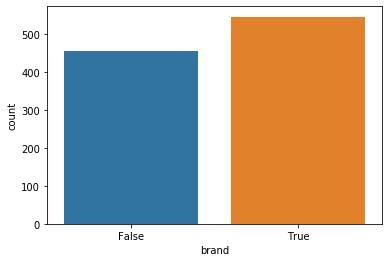

In [235]:
#Understand the target variable we want 
import seaborn as sns 

sns.countplot('brand', data=df1)

Data is relatively balanced, no resampling in the interest of time



**Data Preprocessing**


In [236]:
df1.head()

,username,brand,biography,mediaCount,cityId,latitude,longitude,zip,contactPhoneNumber,followingCount,followerCount,usertagsCount,isBusiness,externalUrl,category,geoMediaCount,shoppablePostsCount,followingTagCount,picture,imageLabels,hasEmail
0,helthematic,True,Jalan Sawahan No. 60 Padang (Dekat Pertamina S...,16.0,NaN,NaN,NaN,NaN,NaN,17.0,265.0,3.0,False,NaN,NaN,0.0,0.0,0.0,https://scontent-iad3-1.cdninstagram.com/vp/a7...,"[('text', 0.92769134, 0.92769134), ('product',...",False
1,shipliam,True,We bring purpose to design. \r\r\nIf you have ...,0.0,0.000000e+00,0.00000,0.00000,NaN,NaN,4.0,19.0,1.0,True,NaN,Social Media Agency,0.0,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/ca...,"[('text', 0.95160943, 0.95160943), ('font', 0....",True
2,thesisurinary,True,"Cara, Sebab, dan Semestinya.\r\r\nNarahubung :...",22.0,1.130935e+14,-7.37467,110.16553,56262,6.285629e+11,381.0,407.0,7.0,True,https://drive.google.com/file/d/1mtEZb8famkPEf...,Local Service,0.0,0.0,0.0,https://scontent-arn2-1.cdninstagram.com/vp/ae...,"[('text', 0.9648511, 0.9648511), ('white', 0.9...",True
3,ashesphentermine,True,❥รับสมัครตัวแทนจำหน่าย\r\r\n❥มี3ธนาคาร+ աaʟʟɛt...,4216.0,1.077829e+14,15.22810,104.85900,NaN,6.696472e+10,5369.0,29575.0,349.0,True,http://bit.ly/2Dozc4Z,Product/Service,0.0,0.0,2.0,https://scontent-arn2-1.cdninstagram.com/vp/91...,"[('face', 0.9701391, 0.9701391), ('skin', 0.95...",True
4,helwillow,True,Premium Ingredients & Good Taste\r\r\nThe Art ...,225.0,NaN,NaN,NaN,NaN,NaN,7448.0,2274.0,26.0,NaN,NaN,NaN,0.0,0.0,3.0,https://scontent-arn2-1.cdninstagram.com/vp/3e...,"[('text', 0.9353178, 0.9353178), ('font', 0.85...",False


In [237]:
df1['contactPhoneNumber'].describe()

count    4.140000e+02
mean     3.787314e+12
std      5.103903e+12
min      6.215009e+08
25%      6.693737e+10
50%      6.281216e+12
75%      6.282228e+12
max      6.289564e+13
Name: contactPhoneNumber, dtype: float64

In [5]:
df1.drop(['username','biography','cityId','zip','externalUrl','picture','geoMediaCount','contactPhoneNumber','latitude','longitude'], axis=1, inplace = True)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
brand                  999 non-null bool
mediaCount             993 non-null float64
followingCount         993 non-null float64
followerCount          993 non-null float64
usertagsCount          993 non-null float64
isBusiness             806 non-null object
category               642 non-null object
shoppablePostsCount    993 non-null float64
followingTagCount      993 non-null float64
imageLabels            999 non-null object
hasEmail               999 non-null bool
dtypes: bool(2), float64(6), object(3)
memory usage: 72.3+ KB


In [7]:
#Check to see if the 6 rows that are null for the 5 count metrics are coming from the same users
indexes = df1.index[df1.mediaCount.isna()].tolist()

In [8]:
#Yes, Proceed to drop the above columns from the dataframe 

df1.drop(index = indexes , inplace =True)

In [9]:
#Convert the data types of float columns to int
df1['mediaCount'] = df1['mediaCount'].astype(np.int64)
df1['followingCount'] = df1['followingCount'].astype(np.int64)
df1['followerCount'] = df1['followerCount'].astype(np.int64)
df1['usertagsCount'] = df1['usertagsCount'].astype(np.int64)
df1['shoppablePostsCount'] = df1['shoppablePostsCount'].astype(np.int64)
df1['followingTagCount'] = df1['followingTagCount'].astype(np.int64)


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 998
Data columns (total 11 columns):
brand                  993 non-null bool
mediaCount             993 non-null int64
followingCount         993 non-null int64
followerCount          993 non-null int64
usertagsCount          993 non-null int64
isBusiness             806 non-null object
category               642 non-null object
shoppablePostsCount    993 non-null int64
followingTagCount      993 non-null int64
imageLabels            993 non-null object
hasEmail               993 non-null bool
dtypes: bool(2), int64(6), object(3)
memory usage: 79.5+ KB


In [11]:
df1.loc[df1.brand == True, 'brand'] = 1
df1.loc[df1.brand == False, 'brand'] = 0
df1.loc[df1.hasEmail == True, 'hasEmail'] = 1
df1.loc[df1.hasEmail == False, 'hasEmail'] = 0
df1.loc[df1.isBusiness == True, 'isBusiness'] = 1
df1.loc[df1.isBusiness == False, 'isBusiness'] = 0
df1['isBusiness'].fillna(2, inplace = True)


In [12]:
from sklearn import preprocessing
#Scale the continous variables in order to ensure same units
df1['mediaCount'] = preprocessing.scale(df1['mediaCount'])
df1['followingCount'] = preprocessing.scale(df1['followingCount'])
df1['followerCount'] = preprocessing.scale(df1['followerCount'])
df1['usertagsCount'] = preprocessing.scale(df1['usertagsCount'])
df1['shoppablePostsCount'] = preprocessing.scale(df1['shoppablePostsCount'])
df1['followingTagCount'] = preprocessing.scale(df1['followingTagCount'])

In [13]:
#Generate dummies for the categorical category variable
df_dummy = pd.get_dummies(df1['category'])
df_new = pd.concat([df1, df_dummy], axis = 1)
df_new.rename(columns = {'brand':'brand_label'}, inplace = True)

In [14]:
df_new.drop(['category'], axis = 1, inplace = True)

In [15]:
df_new.describe()

,brand_label,mediaCount,followingCount,followerCount,usertagsCount,isBusiness,shoppablePostsCount,followingTagCount,hasEmail,Actor,...,Vegetarian/Vegan Restaurant,Video Creator,Visual Arts,Vitamins/Supplements,Website,Wedding Planning Service,Wine/Spirits,Women's Clothing Store,Women's Health Clinic,Writer
count,993.000000,9.930000e+02,9.930000e+02,9.930000e+02,9.930000e+02,993.000000,9.930000e+02,9.930000e+02,993.000000,993.000000,...,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,0.548842,-4.947368e-17,1.779096e-17,1.199807e-17,-1.538017e-17,1.023162,2.200042e-16,7.798394e-17,0.567976,0.004028,...,0.002014,0.003021,0.001007,0.001007,0.005035,0.003021,0.001007,0.003021,0.001007,0.003021
std,0.497859,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,0.594385,1.000504e+00,1.000504e+00,0.495607,0.063372,...,0.044856,0.054910,0.031734,0.031734,0.070816,0.054910,0.031734,0.054910,0.031734,0.054910
min,0.000000,-5.541972e-01,-1.329466e-01,-5.792504e-02,-4.772195e-02,0.000000,-1.048895e-01,-1.771585e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-4.933606e-01,-1.243144e-01,-5.771217e-02,-4.760352e-02,1.000000,-1.048895e-01,-1.771585e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-3.296085e-01,-8.944484e-02,-5.602439e-02,-4.702653e-02,1.000000,-1.048895e-01,-1.771585e-01,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.974614e-02,-2.413537e-02,-5.180604e-02,-4.430561e-02,1.000000,-1.048895e-01,-7.238280e-02,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.351023e+01,3.108066e+01,2.418439e+01,3.051468e+01,2.000000,2.111432e+01,1.742516e+01,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#This part initalises a dictionary with keys as the topic_name
import ast
d = {}

for row in df_new['imageLabels'].values.tolist():
  if row != "[(nan, nan, nan)]":
    a = ast.literal_eval(row) #list 
    for subrow in a:
      test = subrow[0]
      if test in d.keys():
        continue;
      else:
        d[test] = []

In [17]:
count = -1
for row in df_new['imageLabels'].values.tolist():
  count += 1
  if row != "[(nan, nan, nan)]":
    a = ast.literal_eval(row) #list 
    for subrow in a:
      test = subrow[0]
      if test in d.keys():
        d[test].append(subrow[1]*subrow[2]) #Doing product of score and topicality to account for both features
    for k,v in d.items():
      if (len(v) == count):
        d[k].append(0.0)
  else:
    for k,v in d.items():
      d[k].append(0.0)

# for k,v in d.items():
#   if (len(v) <= 20):
#     d.pop(v)

In [18]:
df2 = pd.DataFrame.from_dict(d)
df_scaled = pd.DataFrame(preprocessing.scale(df2), columns=df2.columns) #Scale the scores to ensure same units
df_test = pd.concat([df_new,df_scaled],axis=1)

In [19]:
print(df_new.shape, df2.shape, df_test.shape)

(993, 167) (993, 887) (999, 1054)


In [20]:
df_test = df_test.drop(['imageLabels'], axis = 1)

In [21]:
df_test = df_test.dropna(how='any',axis=0) 

In [22]:
df_test.shape #Ensure that dropping nulls do not cause a large reduction in the dataset size 

(987, 1053)

In [23]:
import random 
random.seed(42)

X = df_test.drop(labels = ["brand_label"], axis=1)
Y = df_test["brand_label"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42) #split into train test set of size ratio 2:1

In [25]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis =1)
test.head()

,mediaCount,followingCount,followerCount,usertagsCount,isBusiness,shoppablePostsCount,followingTagCount,hasEmail,Actor,Advertising Agency,...,computer icon,portable communications device,place of worship,town square,mosque,mecca,pedestrian,organization,portrait photography,brand_label
310,-0.513639,-0.128744,-0.057907,-0.047594,1.0,-0.104889,-0.177158,1.0,0.0,0.0,...,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,1.0
139,2.433390,-0.125564,-0.057897,-0.047682,0.0,-0.104889,-0.177158,0.0,0.0,0.0,...,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,1.0
502,-0.548114,-0.132152,-0.057897,-0.047178,2.0,-0.104889,-0.177158,0.0,0.0,0.0,...,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,1.0
858,0.838455,0.718916,-0.057696,-0.047673,1.0,-0.104889,12.710251,1.0,0.0,0.0,...,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,0.0
88,-0.388924,-0.121588,-0.056761,-0.047324,1.0,-0.104889,-0.177158,1.0,0.0,0.0,...,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,-0.03175,1.0


**SVM**

This is the baseline

In [26]:
from sklearn.svm import SVC
#blind test without tuning
classifier = SVC(kernel='rbf', random_state = 1, gamma = "auto")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report
#check accuracy of model for predictions
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.42      0.16      0.23       149
         1.0       0.54      0.81      0.65       177

    accuracy                           0.52       326
   macro avg       0.48      0.49      0.44       326
weighted avg       0.48      0.52      0.46       326

col_0        0.0  1.0
brand_label          
0.0           24  125
1.0           33  144


Do a grid search to find the best parameters

In [27]:
from sklearn.model_selection import GridSearchCV

from scipy.stats import randint as sp_randint
#DIRTY DATA TRAIN + TUNE
classifier = SVC(kernel='rbf', random_state = 1, gamma = "auto")
classifier.fit(X_train, y_train)
np.random.seed(123)
g_range = np.random.uniform(0.0, 0.3, 5).astype(float)
C_range = np.random.normal(1, 0.1, 5).astype(float)
hyperparameters = {'gamma': list(g_range),
'C': list(C_range)}
model = GridSearchCV(SVC(kernel='rbf', ), hyperparameters)

model.fit(X_train, y_train)
best_score = model.best_score_
best_params = model.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
  print('%s: %r' % (param_name, best_params[param_name]))

C:\Users\65918\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best score: 0.5612708018154312
Best params: 
C: 0.8380699934963254
gamma: 0.2089407556793585


Fitting with the optimised parameters

In [28]:
rbfSVM = SVC(kernel='rbf', C=0.8380699934963254, gamma=0.2089407556793585)
rbfSVM.fit(X_train, y_train)
y_pred = rbfSVM.predict(X_test)

from sklearn.metrics import classification_report
#check accuracy of model for predictions
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.36      0.03      0.05       149
         1.0       0.54      0.96      0.69       177

    accuracy                           0.53       326
   macro avg       0.45      0.49      0.37       326
weighted avg       0.46      0.53      0.40       326

col_0        0.0  1.0
brand_label          
0.0            4  145
1.0            7  170


Slight increase in evaluation metrics, but model is mostly just classifying everything as a brand. Look at alternative models.

**XGBoost**

Establish a baseline for comparison


In [83]:
## fit the model on the original training dataset
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

clf = XGBClassifier()
clf.fit(X_train, y_train)
## make prediction on the X_test dataset
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#check accuracy of model for predictions
print(classification_report(y_test,predictions))
print(pd.crosstab(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.68      0.63      0.66       149
         1.0       0.71      0.75      0.73       177

    accuracy                           0.70       326
   macro avg       0.69      0.69      0.69       326
weighted avg       0.70      0.70      0.70       326

col_0        0.0  1.0
brand_label          
0.0           94   55
1.0           44  133


Seems better than SVM already

Do a randomised search CV to get the optimised parameters

In [55]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
'silent': [False],
'max_depth': [3, 6, 10, 15, 20],
'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
'min_child_weight': [0.5, 1.0, 3.0, 5.0],
'gamma': [0, 0.25, 0.5, 1.0],
'reg_lambda': [1.0, 5.0, 10.0, 50.0],
'n_estimators': [20,40,60,80,100]}
clf_model = RandomizedSearchCV(clf, param_grid,
n_jobs=1, verbose=0, cv=5,
scoring='accuracy', refit=True,random_state = 42, n_iter = 80)
clf_model.fit(X_train, y_train)
best_score = clf_model.best_score_
best_params = clf_model.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
  print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.7639939485627837
Best params: 
gamma: 1.0
learning_rate: 0.3
max_depth: 3
min_child_weight: 0.5
n_estimators: 60
reg_lambda: 1.0
silent: False
subsample: 1.0


Fitting with the optimal parameters

In [84]:
clf_optimized = XGBClassifier(gamma = 1.0, learning_rate = 0.3, max_depth = 3, 
min_child_weight = 0.5, n_estimators = 60, reg_lambda = 1.0, silent = False, subsample = 1.0)

clf_optimized.fit(X_train, y_train)
## make prediction on the X_test dataset
predictions = clf_optimized.predict(X_test)
#check accuracy of model for predictions
print(f1_score(y_test, predictions))
print(classification_report(y_test,predictions))
print(pd.crosstab(y_test,predictions))

0.743801652892562
              precision    recall  f1-score   support

         0.0       0.70      0.66      0.68       149
         1.0       0.73      0.76      0.74       177

    accuracy                           0.71       326
   macro avg       0.71      0.71      0.71       326
weighted avg       0.71      0.71      0.71       326

col_0        0.0  1.0
brand_label          
0.0           98   51
1.0           42  135


Feature selection

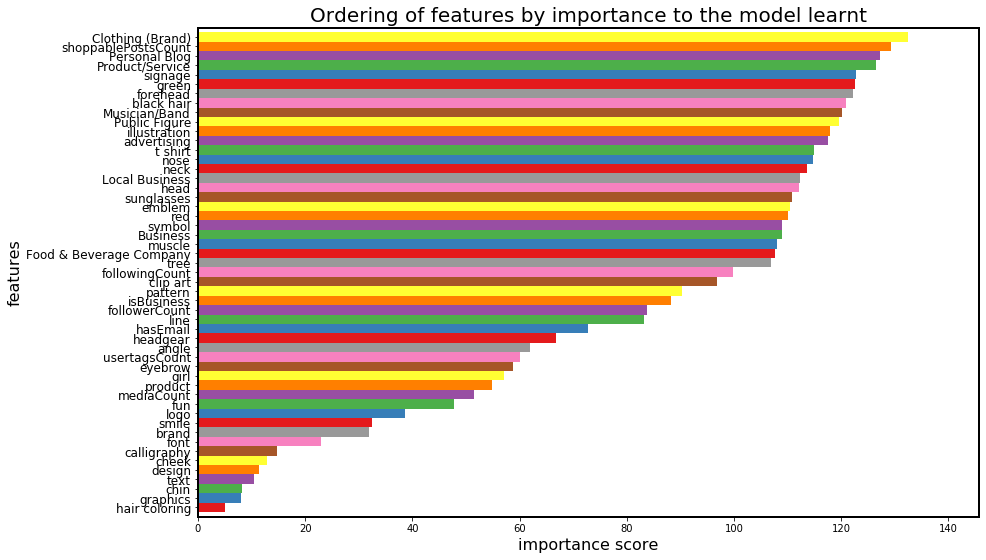

In [85]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)
colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)
  ax.set_xlabel('importance score', size = 16);
  ax.set_ylabel('features', size = 16);
  ax.set_yticklabels(ax.get_yticklabels(), size = 12);
  ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [87]:
selected = ['Clothing (Brand)', 'shoppablePostsCount', 'Personal Blog', 'Product/Service','signage','green', 'forehead',
            'black hair','Musician/Band',  'Public Figure', 'illustration', 'advertising', 't shirt','nose','neck','Local Business','head','sunglasses',
            'emblem','red','symbol','Business','muscle','Food & Beverage Company', 'tree','followingCount', 'clip art', 'pattern', 'isBusiness', 'followerCount', 'line','hasEmail'] #Choosing of features with importance score at least >=70

X_train_new = X_train[selected].copy()

Training new model with selected features only

In [61]:
clf_new = XGBClassifier()
clf_new.fit(X_train_new, y_train)
# hyperparamter tuning; define the parameters grid
param_grid = {
'silent': [False],
'max_depth': [3,6, 10, 15, 20],
'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
'min_child_weight': [0.5, 1.0, 3.0, 5.0],
'gamma': [0, 0.25, 0.5, 1.0],
'reg_lambda': [1.0, 5.0, 10.0, 50.0],
'n_estimators': [20,40,60,80, 100]}
clf_modelS = RandomizedSearchCV(clf_new, param_grid, n_iter=100,
n_jobs=1, verbose=0, cv=5,
scoring='accuracy', refit=True, random_state=42)

clf_modelS.fit(X_train_new, y_train)
best_score = clf_modelS.best_score_
best_params = clf_modelS.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
  print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.7382753403933434
Best params: 
gamma: 1.0
learning_rate: 0.3
max_depth: 3
min_child_weight: 0.5
n_estimators: 60
reg_lambda: 1.0
silent: False
subsample: 1.0


In [89]:
clfS_optimized = XGBClassifier(gamma = 1.0, learning_rate = 0.3, max_depth = 3, min_child_weight = 0.5,
                               n_estimators = 60, reg_lambda = 1.0, silent = False, subsample = 1.0)
clfS_optimized.fit(X_train_new, y_train)

new_X_test = X_test[selected].copy()
new_y_test = y_test.copy()
## make prediction on the X_test dataset
predictionS = clfS_optimized.predict(new_X_test)
#check accuracy of model for predictions
print(f1_score(new_y_test, predictions))
print(classification_report(new_y_test,predictionS))
print(pd.crosstab(new_y_test,predictionS))

0.743801652892562
              precision    recall  f1-score   support

         0.0       0.65      0.64      0.65       149
         1.0       0.70      0.71      0.70       177

    accuracy                           0.68       326
   macro avg       0.68      0.68      0.68       326
weighted avg       0.68      0.68      0.68       326

col_0        0.0  1.0
brand_label          
0.0           96   53
1.0           52  125


**RF**

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# feature selection
from sklearn.feature_selection import SelectFromModel

Establish a baseline

In [64]:
# Instantiate model with 1000 decision trees
rf1 = RandomForestClassifier(n_estimators = 1000, bootstrap = True,
random_state = 42)

# Train the model on training data
rf1.fit(X_train, y_train);
# Test accuracy on test data
predictions = rf1.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(f1_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.6687116564417178
[[ 85  64]
 [ 44 133]]
0.7112299465240641
              precision    recall  f1-score   support

         0.0       0.66      0.57      0.61       149
         1.0       0.68      0.75      0.71       177

    accuracy                           0.67       326
   macro avg       0.67      0.66      0.66       326
weighted avg       0.67      0.67      0.67       326



Do a randomised search to optimise parameters

In [66]:
# Number of trees in random forest
n_estimators = [200,400,600,800,1000,1200,1400,1600,1800,2000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5, 10, 20, 30, 40]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap,
'criterion' :['gini', 'entropy']
}

In [67]:
RFmodel = RandomForestClassifier()
rf_original_RS = RandomizedSearchCV(estimator = RFmodel, param_distributions = param_grid, random_state=42, n_iter = 100)
rf_original_RS.fit(X_train, y_train)

C:\Users\sean.lee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [69]:
print(rf_original_RS.best_score_)
print(rf_original_RS.best_params_)

0.735249621785174
{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'criterion': 'entropy', 'bootstrap': False}


In [70]:
rf2 = RandomForestClassifier(n_estimators = 2000, bootstrap = False,random_state = 42, criterion = 'entropy',
max_depth = 40, min_samples_leaf = 1
, min_samples_split = 10,
max_features = 'auto')

# Train the model on training data
rf2.fit(X_train, y_train);
# Test accuracy on test data
predictions = rf2.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(f1_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.6901840490797546
[[ 95  54]
 [ 47 130]]
0.7202216066481996
              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65       149
         1.0       0.71      0.73      0.72       177

    accuracy                           0.69       326
   macro avg       0.69      0.69      0.69       326
weighted avg       0.69      0.69      0.69       326



In [71]:
# features selection
new_feature_list = list(X_train.columns)
feature_importances = pd.DataFrame(rf2.feature_importances_,
index = new_feature_list,
columns = ['importance']).sort_values('importance', ascending = False)
feature_importances[0:20]

,importance
followingCount,0.060579
followerCount,0.052782
usertagsCount,0.046308
mediaCount,0.043166
product,0.021408
Personal Blog,0.021289
font,0.019005
hasEmail,0.018404
brand,0.017408
line,0.017329


In [72]:
selected = ['followingCount', 'followerCount', 'usertagsCount', 'mediaCount', 'product','font','Personal Blog','brand','isBusiness', 'logo', 'hasEmail' , 'line','text', 'graphics',
            'Clothing (Brand)', 'shoppablePostsCount', 'black hair'] #Select all features with importance > 0.01
new_x_train = X_train[selected]
new_y_train = y_train

RFmodel2 = RandomForestClassifier()
rf_new = RandomizedSearchCV(estimator = RFmodel2, param_distributions= param_grid, random_state=42, n_iter = 100)
rf_new.fit(new_x_train, new_y_train)

C:\Users\sean.lee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [73]:
print(rf_new.best_score_)
print(rf_new.best_params_)

0.7609682299546142
{'n_estimators': 800, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'entropy', 'bootstrap': True}


In [74]:
RFmodel_new = RandomForestClassifier(n_estimators = 800, bootstrap = True,random_state = 42, criterion = 'entropy',
max_depth = 40, min_samples_leaf = 1
, min_samples_split = 15,
max_features = 'sqrt')
new_x_test = X_test[selected]
RFmodel_new.fit(new_x_train, new_y_train)
predictions = RFmodel_new.predict(new_x_test)

print(confusion_matrix(y_test, predictions))
print(f1_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.6779141104294478
[[ 90  59]
 [ 46 131]]
0.7138964577656676
              precision    recall  f1-score   support

         0.0       0.66      0.60      0.63       149
         1.0       0.69      0.74      0.71       177

    accuracy                           0.68       326
   macro avg       0.68      0.67      0.67       326
weighted avg       0.68      0.68      0.68       326



In [34]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score

rf1 = CatBoostClassifier(n_estimators = 2000,
random_state = 42)


# Train the model on training data
rf1.fit(X_train, y_train);
# Test accuracy on test data
predictions = rf1.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(f1_score(y_test, predictions))
print(classification_report(y_test, predictions))

ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject

In [44]:
from sklearn.model_selection import RandomizedSearchCV
clf_new = CatBoostClassifier()
clf_new.fit(X_train, y_train)
# hyperparamter tuning; define the parameters grid

param_grid = {
'depth': [3, 6, 10, 15],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'l2_leaf_reg':[1,3,5,7,9],
#'min_child_samples': [0.5, 1.0, 3.0, 5.0],
'iterations': [100,200,300,400],
'bagging_temperature': [1.0, 5.0, 10.0],
'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]}
clf_modelS = RandomizedSearchCV(clf_new, param_grid, n_iter=10,
n_jobs=1, verbose=0, cv=5,
scoring='accuracy', refit=True, random_state=42)

clf_modelS.fit(X_train, y_train)
best_score = clf_modelS.best_score_
best_params = clf_modelS.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
  print('%s: %r' % (param_name, best_params[param_name]))

Learning rate set to 0.008633
0:	learn: 0.6918333	total: 7.33ms	remaining: 7.32s
1:	learn: 0.6901901	total: 13.7ms	remaining: 6.83s
2:	learn: 0.6885787	total: 19.1ms	remaining: 6.36s
3:	learn: 0.6864833	total: 24.3ms	remaining: 6.04s
4:	learn: 0.6848905	total: 31.1ms	remaining: 6.18s
5:	learn: 0.6833954	total: 35.6ms	remaining: 5.89s
6:	learn: 0.6820095	total: 40.3ms	remaining: 5.72s
7:	learn: 0.6798091	total: 45.5ms	remaining: 5.64s
8:	learn: 0.6775729	total: 49.8ms	remaining: 5.49s
9:	learn: 0.6764591	total: 54.3ms	remaining: 5.37s
10:	learn: 0.6749005	total: 58.8ms	remaining: 5.28s
11:	learn: 0.6742890	total: 63.1ms	remaining: 5.2s
12:	learn: 0.6726653	total: 67.4ms	remaining: 5.12s
13:	learn: 0.6708861	total: 71.7ms	remaining: 5.05s
14:	learn: 0.6690730	total: 76ms	remaining: 4.99s
15:	learn: 0.6683552	total: 80.3ms	remaining: 4.94s
16:	learn: 0.6662407	total: 84.6ms	remaining: 4.89s
17:	learn: 0.6646927	total: 88.8ms	remaining: 4.84s
18:	learn: 0.6634122	total: 93.2ms	remaining: 4

177:	learn: 0.5131166	total: 872ms	remaining: 4.03s
178:	learn: 0.5126322	total: 878ms	remaining: 4.03s
179:	learn: 0.5124035	total: 883ms	remaining: 4.02s
180:	learn: 0.5115229	total: 890ms	remaining: 4.03s
181:	learn: 0.5107827	total: 896ms	remaining: 4.03s
182:	learn: 0.5101696	total: 903ms	remaining: 4.03s
183:	learn: 0.5099039	total: 910ms	remaining: 4.04s
184:	learn: 0.5094590	total: 916ms	remaining: 4.03s
185:	learn: 0.5090028	total: 922ms	remaining: 4.03s
186:	learn: 0.5085495	total: 929ms	remaining: 4.04s
187:	learn: 0.5075196	total: 936ms	remaining: 4.04s
188:	learn: 0.5067855	total: 942ms	remaining: 4.04s
189:	learn: 0.5065091	total: 947ms	remaining: 4.04s
190:	learn: 0.5060357	total: 953ms	remaining: 4.04s
191:	learn: 0.5058102	total: 960ms	remaining: 4.04s
192:	learn: 0.5051881	total: 966ms	remaining: 4.04s
193:	learn: 0.5048355	total: 972ms	remaining: 4.04s
194:	learn: 0.5042534	total: 978ms	remaining: 4.04s
195:	learn: 0.5036758	total: 983ms	remaining: 4.03s
196:	learn: 

366:	learn: 0.4340991	total: 1.92s	remaining: 3.32s
367:	learn: 0.4338194	total: 1.93s	remaining: 3.31s
368:	learn: 0.4336703	total: 1.93s	remaining: 3.3s
369:	learn: 0.4331975	total: 1.94s	remaining: 3.3s
370:	learn: 0.4329000	total: 1.94s	remaining: 3.29s
371:	learn: 0.4325260	total: 1.95s	remaining: 3.29s
372:	learn: 0.4322337	total: 1.95s	remaining: 3.28s
373:	learn: 0.4319837	total: 1.96s	remaining: 3.27s
374:	learn: 0.4317086	total: 1.96s	remaining: 3.27s
375:	learn: 0.4315951	total: 1.96s	remaining: 3.26s
376:	learn: 0.4311949	total: 1.97s	remaining: 3.25s
377:	learn: 0.4309771	total: 1.97s	remaining: 3.25s
378:	learn: 0.4308079	total: 1.98s	remaining: 3.24s
379:	learn: 0.4305643	total: 1.98s	remaining: 3.23s
380:	learn: 0.4303534	total: 1.99s	remaining: 3.23s
381:	learn: 0.4301383	total: 1.99s	remaining: 3.22s
382:	learn: 0.4298341	total: 1.99s	remaining: 3.21s
383:	learn: 0.4294480	total: 2s	remaining: 3.21s
384:	learn: 0.4290142	total: 2s	remaining: 3.2s
385:	learn: 0.4286693

525:	learn: 0.3918148	total: 2.62s	remaining: 2.36s
526:	learn: 0.3916762	total: 2.63s	remaining: 2.36s
527:	learn: 0.3914904	total: 2.63s	remaining: 2.35s
528:	learn: 0.3912673	total: 2.64s	remaining: 2.35s
529:	learn: 0.3909715	total: 2.64s	remaining: 2.34s
530:	learn: 0.3906280	total: 2.65s	remaining: 2.34s
531:	learn: 0.3902342	total: 2.65s	remaining: 2.33s
532:	learn: 0.3899494	total: 2.66s	remaining: 2.33s
533:	learn: 0.3898262	total: 2.66s	remaining: 2.32s
534:	learn: 0.3897407	total: 2.67s	remaining: 2.32s
535:	learn: 0.3894586	total: 2.67s	remaining: 2.31s
536:	learn: 0.3893041	total: 2.67s	remaining: 2.31s
537:	learn: 0.3890278	total: 2.68s	remaining: 2.3s
538:	learn: 0.3886442	total: 2.68s	remaining: 2.29s
539:	learn: 0.3885357	total: 2.69s	remaining: 2.29s
540:	learn: 0.3880735	total: 2.69s	remaining: 2.28s
541:	learn: 0.3877519	total: 2.7s	remaining: 2.28s
542:	learn: 0.3875065	total: 2.7s	remaining: 2.27s
543:	learn: 0.3873459	total: 2.71s	remaining: 2.27s
544:	learn: 0.3

719:	learn: 0.3477265	total: 3.5s	remaining: 1.36s
720:	learn: 0.3475391	total: 3.5s	remaining: 1.36s
721:	learn: 0.3473510	total: 3.51s	remaining: 1.35s
722:	learn: 0.3470938	total: 3.51s	remaining: 1.35s
723:	learn: 0.3467140	total: 3.52s	remaining: 1.34s
724:	learn: 0.3465805	total: 3.52s	remaining: 1.34s
725:	learn: 0.3463686	total: 3.53s	remaining: 1.33s
726:	learn: 0.3459759	total: 3.54s	remaining: 1.33s
727:	learn: 0.3458381	total: 3.54s	remaining: 1.32s
728:	learn: 0.3455647	total: 3.54s	remaining: 1.32s
729:	learn: 0.3452429	total: 3.55s	remaining: 1.31s
730:	learn: 0.3451326	total: 3.56s	remaining: 1.31s
731:	learn: 0.3448000	total: 3.56s	remaining: 1.3s
732:	learn: 0.3445661	total: 3.57s	remaining: 1.3s
733:	learn: 0.3442891	total: 3.58s	remaining: 1.29s
734:	learn: 0.3439982	total: 3.58s	remaining: 1.29s
735:	learn: 0.3436011	total: 3.59s	remaining: 1.29s
736:	learn: 0.3431852	total: 3.59s	remaining: 1.28s
737:	learn: 0.3428861	total: 3.6s	remaining: 1.28s
738:	learn: 0.342

899:	learn: 0.3071156	total: 4.37s	remaining: 486ms
900:	learn: 0.3068215	total: 4.38s	remaining: 481ms
901:	learn: 0.3065583	total: 4.38s	remaining: 476ms
902:	learn: 0.3063004	total: 4.39s	remaining: 472ms
903:	learn: 0.3062255	total: 4.39s	remaining: 467ms
904:	learn: 0.3061017	total: 4.4s	remaining: 462ms
905:	learn: 0.3059101	total: 4.41s	remaining: 457ms
906:	learn: 0.3057617	total: 4.41s	remaining: 452ms
907:	learn: 0.3055834	total: 4.42s	remaining: 448ms
908:	learn: 0.3054274	total: 4.42s	remaining: 443ms
909:	learn: 0.3053333	total: 4.43s	remaining: 438ms
910:	learn: 0.3052665	total: 4.43s	remaining: 433ms
911:	learn: 0.3050962	total: 4.44s	remaining: 428ms
912:	learn: 0.3048629	total: 4.44s	remaining: 423ms
913:	learn: 0.3045832	total: 4.45s	remaining: 418ms
914:	learn: 0.3044729	total: 4.45s	remaining: 414ms
915:	learn: 0.3042776	total: 4.46s	remaining: 409ms
916:	learn: 0.3041869	total: 4.46s	remaining: 404ms
917:	learn: 0.3041028	total: 4.46s	remaining: 399ms
918:	learn: 0

59:	learn: 0.5851425	total: 2.83s	remaining: 1.88s
60:	learn: 0.5832648	total: 2.88s	remaining: 1.84s
61:	learn: 0.5818534	total: 2.93s	remaining: 1.79s
62:	learn: 0.5798459	total: 2.98s	remaining: 1.75s
63:	learn: 0.5783442	total: 3.03s	remaining: 1.7s
64:	learn: 0.5770487	total: 3.07s	remaining: 1.66s
65:	learn: 0.5755913	total: 3.12s	remaining: 1.61s
66:	learn: 0.5741736	total: 3.17s	remaining: 1.56s
67:	learn: 0.5728502	total: 3.22s	remaining: 1.51s
68:	learn: 0.5708092	total: 3.27s	remaining: 1.47s
69:	learn: 0.5695861	total: 3.32s	remaining: 1.42s
70:	learn: 0.5685490	total: 3.36s	remaining: 1.37s
71:	learn: 0.5674790	total: 3.42s	remaining: 1.33s
72:	learn: 0.5657882	total: 3.49s	remaining: 1.29s
73:	learn: 0.5650319	total: 3.54s	remaining: 1.25s
74:	learn: 0.5641858	total: 3.59s	remaining: 1.2s
75:	learn: 0.5628121	total: 3.64s	remaining: 1.15s
76:	learn: 0.5620049	total: 3.69s	remaining: 1.1s
77:	learn: 0.5608474	total: 3.73s	remaining: 1.05s
78:	learn: 0.5591077	total: 3.77s	

22:	learn: 0.6358702	total: 1.34s	remaining: 4.5s
23:	learn: 0.6324987	total: 1.4s	remaining: 4.44s
24:	learn: 0.6295067	total: 1.46s	remaining: 4.37s
25:	learn: 0.6269536	total: 1.52s	remaining: 4.34s
26:	learn: 0.6247905	total: 1.58s	remaining: 4.27s
27:	learn: 0.6218131	total: 1.64s	remaining: 4.21s
28:	learn: 0.6200290	total: 1.7s	remaining: 4.15s
29:	learn: 0.6184056	total: 1.76s	remaining: 4.11s
30:	learn: 0.6161939	total: 1.82s	remaining: 4.04s
31:	learn: 0.6149778	total: 1.87s	remaining: 3.98s
32:	learn: 0.6126080	total: 1.93s	remaining: 3.92s
33:	learn: 0.6096412	total: 1.99s	remaining: 3.86s
34:	learn: 0.6080832	total: 2.04s	remaining: 3.79s
35:	learn: 0.6060214	total: 2.1s	remaining: 3.73s
36:	learn: 0.6045552	total: 2.15s	remaining: 3.67s
37:	learn: 0.6025974	total: 2.22s	remaining: 3.62s
38:	learn: 0.6007825	total: 2.28s	remaining: 3.56s
39:	learn: 0.5983039	total: 2.33s	remaining: 3.5s
40:	learn: 0.5976236	total: 2.4s	remaining: 3.45s
41:	learn: 0.5955545	total: 2.45s	rem

86:	learn: 0.5387108	total: 5.3s	remaining: 792ms
87:	learn: 0.5373693	total: 5.37s	remaining: 732ms
88:	learn: 0.5363212	total: 5.43s	remaining: 671ms
89:	learn: 0.5352810	total: 5.49s	remaining: 609ms
90:	learn: 0.5340671	total: 5.55s	remaining: 549ms
91:	learn: 0.5327939	total: 5.61s	remaining: 488ms
92:	learn: 0.5316877	total: 5.66s	remaining: 426ms
93:	learn: 0.5304223	total: 5.72s	remaining: 365ms
94:	learn: 0.5301022	total: 5.78s	remaining: 304ms
95:	learn: 0.5294229	total: 5.83s	remaining: 243ms
96:	learn: 0.5283609	total: 5.89s	remaining: 182ms
97:	learn: 0.5274984	total: 5.95s	remaining: 121ms
98:	learn: 0.5258360	total: 6.01s	remaining: 60.7ms
99:	learn: 0.5241300	total: 6.08s	remaining: 0us
0:	learn: 0.6909381	total: 53.3ms	remaining: 5.27s
1:	learn: 0.6876799	total: 105ms	remaining: 5.14s
2:	learn: 0.6845996	total: 158ms	remaining: 5.11s
3:	learn: 0.6821564	total: 213ms	remaining: 5.1s
4:	learn: 0.6799980	total: 268ms	remaining: 5.1s
5:	learn: 0.6782436	total: 326ms	remain

68:	learn: 0.2253812	total: 363ms	remaining: 689ms
69:	learn: 0.2247664	total: 368ms	remaining: 684ms
70:	learn: 0.2241922	total: 375ms	remaining: 680ms
71:	learn: 0.2182917	total: 380ms	remaining: 675ms
72:	learn: 0.2177012	total: 385ms	remaining: 669ms
73:	learn: 0.2146947	total: 389ms	remaining: 663ms
74:	learn: 0.2129868	total: 395ms	remaining: 658ms
75:	learn: 0.2084918	total: 401ms	remaining: 655ms
76:	learn: 0.2079918	total: 406ms	remaining: 649ms
77:	learn: 0.2057546	total: 413ms	remaining: 645ms
78:	learn: 0.2009451	total: 419ms	remaining: 641ms
79:	learn: 0.2002235	total: 424ms	remaining: 636ms
80:	learn: 0.1960326	total: 429ms	remaining: 631ms
81:	learn: 0.1954958	total: 435ms	remaining: 626ms
82:	learn: 0.1937353	total: 440ms	remaining: 620ms
83:	learn: 0.1927465	total: 445ms	remaining: 615ms
84:	learn: 0.1922985	total: 450ms	remaining: 609ms
85:	learn: 0.1918919	total: 455ms	remaining: 603ms
86:	learn: 0.1887578	total: 460ms	remaining: 598ms
87:	learn: 0.1835602	total: 466

32:	learn: 0.3540876	total: 181ms	remaining: 916ms
33:	learn: 0.3515191	total: 188ms	remaining: 919ms
34:	learn: 0.3496223	total: 194ms	remaining: 915ms
35:	learn: 0.3381940	total: 201ms	remaining: 914ms
36:	learn: 0.3333295	total: 207ms	remaining: 911ms
37:	learn: 0.3246000	total: 215ms	remaining: 915ms
38:	learn: 0.3214643	total: 220ms	remaining: 910ms
39:	learn: 0.3194405	total: 226ms	remaining: 902ms
40:	learn: 0.3112037	total: 233ms	remaining: 903ms
41:	learn: 0.3058788	total: 239ms	remaining: 900ms
42:	learn: 0.2936810	total: 246ms	remaining: 898ms
43:	learn: 0.2898234	total: 253ms	remaining: 898ms
44:	learn: 0.2848448	total: 258ms	remaining: 890ms
45:	learn: 0.2835643	total: 265ms	remaining: 888ms
46:	learn: 0.2814463	total: 270ms	remaining: 880ms
47:	learn: 0.2805565	total: 276ms	remaining: 873ms
48:	learn: 0.2796610	total: 282ms	remaining: 870ms
49:	learn: 0.2734440	total: 288ms	remaining: 863ms
50:	learn: 0.2716527	total: 295ms	remaining: 861ms
51:	learn: 0.2700965	total: 300

0:	learn: 0.6621410	total: 6.76ms	remaining: 1.34s
1:	learn: 0.6214266	total: 11.7ms	remaining: 1.16s
2:	learn: 0.5971387	total: 16.9ms	remaining: 1.11s
3:	learn: 0.5805238	total: 21.5ms	remaining: 1.05s
4:	learn: 0.5624465	total: 26.2ms	remaining: 1.02s
5:	learn: 0.5362499	total: 31.1ms	remaining: 1.01s
6:	learn: 0.5255365	total: 36.3ms	remaining: 1000ms
7:	learn: 0.5082630	total: 41.4ms	remaining: 994ms
8:	learn: 0.4869774	total: 47.1ms	remaining: 999ms
9:	learn: 0.4781844	total: 52.4ms	remaining: 996ms
10:	learn: 0.4738781	total: 58.1ms	remaining: 999ms
11:	learn: 0.4637372	total: 64.3ms	remaining: 1.01s
12:	learn: 0.4498929	total: 69.4ms	remaining: 998ms
13:	learn: 0.4440805	total: 74.4ms	remaining: 988ms
14:	learn: 0.4377462	total: 80.3ms	remaining: 990ms
15:	learn: 0.4338221	total: 85.4ms	remaining: 982ms
16:	learn: 0.4299622	total: 90.5ms	remaining: 974ms
17:	learn: 0.4245173	total: 96.6ms	remaining: 977ms
18:	learn: 0.4153073	total: 102ms	remaining: 968ms
19:	learn: 0.4086610	t

161:	learn: 0.0738772	total: 897ms	remaining: 211ms
162:	learn: 0.0737583	total: 905ms	remaining: 206ms
163:	learn: 0.0736599	total: 911ms	remaining: 200ms
164:	learn: 0.0735420	total: 918ms	remaining: 195ms
165:	learn: 0.0724939	total: 925ms	remaining: 190ms
166:	learn: 0.0722490	total: 932ms	remaining: 184ms
167:	learn: 0.0715881	total: 938ms	remaining: 179ms
168:	learn: 0.0703506	total: 945ms	remaining: 173ms
169:	learn: 0.0701899	total: 953ms	remaining: 168ms
170:	learn: 0.0699991	total: 960ms	remaining: 163ms
171:	learn: 0.0699086	total: 969ms	remaining: 158ms
172:	learn: 0.0698187	total: 975ms	remaining: 152ms
173:	learn: 0.0688193	total: 982ms	remaining: 147ms
174:	learn: 0.0685964	total: 988ms	remaining: 141ms
175:	learn: 0.0684758	total: 994ms	remaining: 136ms
176:	learn: 0.0683939	total: 1s	remaining: 130ms
177:	learn: 0.0682726	total: 1.01s	remaining: 124ms
178:	learn: 0.0680414	total: 1.01s	remaining: 119ms
179:	learn: 0.0675770	total: 1.02s	remaining: 113ms
180:	learn: 0.0

122:	learn: 0.1315084	total: 719ms	remaining: 450ms
123:	learn: 0.1312772	total: 725ms	remaining: 444ms
124:	learn: 0.1283763	total: 731ms	remaining: 439ms
125:	learn: 0.1279502	total: 737ms	remaining: 433ms
126:	learn: 0.1274498	total: 744ms	remaining: 427ms
127:	learn: 0.1268527	total: 749ms	remaining: 421ms
128:	learn: 0.1254049	total: 755ms	remaining: 415ms
129:	learn: 0.1251382	total: 761ms	remaining: 410ms
130:	learn: 0.1248346	total: 766ms	remaining: 403ms
131:	learn: 0.1225308	total: 772ms	remaining: 398ms
132:	learn: 0.1212224	total: 778ms	remaining: 392ms
133:	learn: 0.1184775	total: 783ms	remaining: 386ms
134:	learn: 0.1168983	total: 791ms	remaining: 381ms
135:	learn: 0.1155334	total: 797ms	remaining: 375ms
136:	learn: 0.1152023	total: 802ms	remaining: 369ms
137:	learn: 0.1147631	total: 808ms	remaining: 363ms
138:	learn: 0.1145711	total: 813ms	remaining: 357ms
139:	learn: 0.1123622	total: 818ms	remaining: 351ms
140:	learn: 0.1120937	total: 823ms	remaining: 345ms
141:	learn: 

98:	learn: 0.1416869	total: 540ms	remaining: 551ms
99:	learn: 0.1375335	total: 546ms	remaining: 546ms
100:	learn: 0.1366136	total: 551ms	remaining: 540ms
101:	learn: 0.1363233	total: 557ms	remaining: 535ms
102:	learn: 0.1360551	total: 562ms	remaining: 530ms
103:	learn: 0.1343427	total: 568ms	remaining: 524ms
104:	learn: 0.1339905	total: 573ms	remaining: 518ms
105:	learn: 0.1335958	total: 578ms	remaining: 513ms
106:	learn: 0.1330046	total: 584ms	remaining: 508ms
107:	learn: 0.1293470	total: 590ms	remaining: 503ms
108:	learn: 0.1266149	total: 596ms	remaining: 497ms
109:	learn: 0.1253344	total: 601ms	remaining: 491ms
110:	learn: 0.1250735	total: 606ms	remaining: 486ms
111:	learn: 0.1219633	total: 612ms	remaining: 481ms
112:	learn: 0.1209944	total: 617ms	remaining: 475ms
113:	learn: 0.1207537	total: 623ms	remaining: 470ms
114:	learn: 0.1191597	total: 628ms	remaining: 465ms
115:	learn: 0.1166143	total: 634ms	remaining: 459ms
116:	learn: 0.1163733	total: 639ms	remaining: 454ms
117:	learn: 0.

KeyboardInterrupt: 

Choose the XGBoost model as it results in the best F1 score (balance between precison and recall, since here I do not really know whether False Negatives or False Positives are more important to the problem). However, should it be more necessary to predict brands as brands, the RF method may actually be better. 

**To run new data set **

Replace the code df1 = pd.read_csv('data.csv') with the new file path. Run the cells till the point where all preprocessing steps are done. 

Afterwards, run this code to generate the x values to be fed as model inputs
X = df_test.drop(labels = ["brand_label"], axis=1)
Y = df_test["brand_label"]

Use RFmodel_new.predict(X) / clfS_optimized.predict(X) to generate the predictions, and compare it to the Y values 